$$ |\kappa_{\pm}| = |\frac{1}{2\pi} \oint ds \kappa_s(s) \sqrt{\beta_x(s)\beta_y(s)} e^{i (\phi_x\pm\phi_y-(Q_x \pm Q_y - q\pm)2\pi s/C)}|$$

where ks is the normalized gradient of the skew quadrupole (in units of m-2), $\phi_{x,y} = \frac{1}{\beta_{x,y}(s)}$ the horizontal and vertical betatron phase, C is the circumference, ßx,y are the uncoupled beta functions

LOCO, AT version


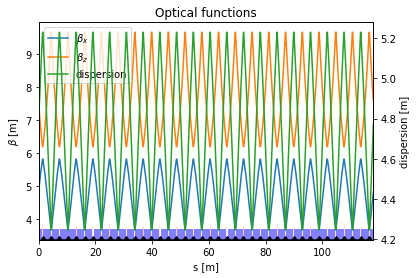

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
print(f"LOCO, AT version")

from at import *

from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
from Lattice import *
ring=at.Lattice(ring2, energy=1)

ring.radiation_off()
ring.plot_beta()

In [2]:
t0_fullCode = time.time()

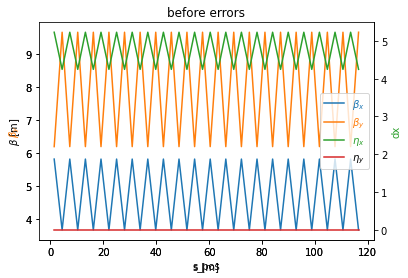

getOptics: 0.3460714817047119 sec


In [3]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [4]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(1, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  40
Number of used Correctors:  40
Execution time choose correctors: 0.0009963512420654297 sec


In [5]:
eta_xx, eta_yy= eta(ring)
print(shape(eta_xx))
print(eta_yy)

(301,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 1 #use all quads individually
used_quadrpoles_families, used_quadrpoles_families_ind = used_quadrpoles(ring, steps)
used_qs_families, used_qs_families_ind = used_skew(ring, steps)

t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QF: 20 # of QD: 20
used_quadrpoles_families_ind:  40
# of QS: 10
used_qs_families_ind:  10
Execution time chose quadrpoles: 0.002994537353515625 sec


In [7]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 0.9175772666931152 sec
orm dimensions:  (40, 40)
0.0
0.0
5778.075710424884
112.00324008777744


In [8]:
dk =1.e-04

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time generatingQuadsResponse: {t1-t0} sec")

generating response to family  1
Execution time: 0.8826780319213867 sec
generating response to family  2
Execution time: 0.9109256267547607 sec
generating response to family  3
Execution time: 0.8674149513244629 sec
generating response to family  4
Execution time: 0.8597347736358643 sec
generating response to family  5
Execution time: 0.8726325035095215 sec
generating response to family  6
Execution time: 0.9066259860992432 sec
generating response to family  7
Execution time: 0.8407387733459473 sec
generating response to family  8
Execution time: 0.8646516799926758 sec
generating response to family  9
Execution time: 0.8443019390106201 sec
generating response to family  10
Execution time: 0.8395233154296875 sec
generating response to family  11
Execution time: 0.8566882610321045 sec
generating response to family  12
Execution time: 0.8556365966796875 sec
generating response to family  13
Execution time: 0.8377299308776855 sec
generating response to family  14
Execution time: 0.87064075

In [9]:
C0x_s, C0y_s, C0xy_s, C0yx_s, dCx_s, dCy_s, dCxy_s,dCyx_s = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_qs_families_ind, used_correctors)

generating response to family  1
Execution time: 0.8515524864196777 sec
generating response to family  2
Execution time: 0.8554623126983643 sec
generating response to family  3
Execution time: 0.8576669692993164 sec
generating response to family  4
Execution time: 0.8696739673614502 sec
generating response to family  5
Execution time: 0.8667240142822266 sec
generating response to family  6
Execution time: 0.8769218921661377 sec
generating response to family  7
Execution time: 0.8544421195983887 sec
generating response to family  8
Execution time: 0.861762285232544 sec
generating response to family  9
Execution time: 0.8632981777191162 sec
generating response to family  10
Execution time: 0.8716626167297363 sec


In [10]:
for i in used_qs_families_ind:
    for j in i:
        ring[j].K = 0.05

Text(0, 0.5, '$\\Delta K[m^-2]$')

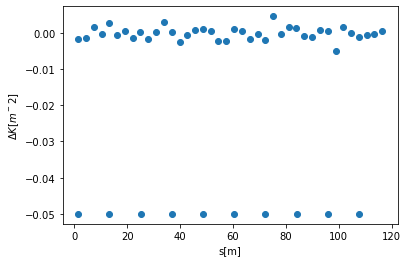

In [11]:
gradErr = 1.e-3
simulateRandomGradientErrors(ring, gradErr, used_quadrpoles_families_ind)
simulateAlignmentErrors(ring, 1.e-5, used_quadrpoles_families_ind)

#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
twissq = getOptics(ring, elements.Quadrupole, BPMs_random_noise )
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twissq.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

In [12]:
# DRM (dispersion responce matrix)

eta_xx_err1, eta_yy_err1 = eta(ring)

print(shape(eta_yy_err1))
print(eta_yy_err1)

(301,)
[-0.09528959 -0.07116015 -0.07116015 -0.06930403 -0.06930403 -0.06782726
 -0.06822357 -0.07011345 -0.09468178 -0.11925011 -0.11925011 -0.12113999
 -0.12113999 -0.12193551 -0.12163431 -0.11771864 -0.11380297 -0.11380297
 -0.11350176 -0.11350176 -0.11382453 -0.11477187 -0.11571921 -0.12803461
 -0.14035002 -0.14035002 -0.14129735 -0.14129735 -0.14097159 -0.1393737
 -0.11860112 -0.09782854 -0.09782854 -0.09623064 -0.09623064 -0.09515875
 -0.09574105 -0.09745098 -0.11968001 -0.14190904 -0.14190904 -0.14361896
 -0.14361896 -0.14403291 -0.14314964 -0.13166711 -0.12018457 -0.12018457
 -0.1193013  -0.1193013  -0.11907345 -0.11950059 -0.11992774 -0.12548068
 -0.13103361 -0.13103361 -0.13146076 -0.13146076 -0.13070552 -0.12877014
 -0.10361025 -0.07845037 -0.07845037 -0.07651499 -0.07651499 -0.07499782
 -0.07529324 -0.07698428 -0.09896788 -0.12095148 -0.12095148 -0.12264252
 -0.12264252 -0.12322655 -0.12270181 -0.11588018 -0.10905856 -0.10905856
 -0.10853382 -0.10853382 -0.10860612 -0.10927

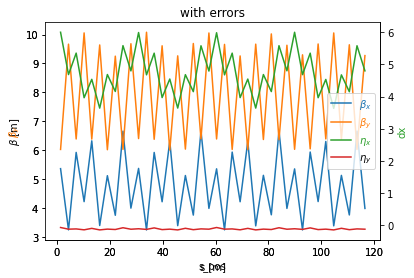

In [13]:
twiss_err = getOptics(ring, elements.Monitor, BPMs_random_noise ) #####
make_plot_all2(twiss_err, 'with errors')

In [14]:
bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_err)

RMS beta beat, x:9.919722350273984%   y: 2.8878212942984547%
STD beta beat, x:9.875352174857042%   y: 2.88651232651451%


In [15]:
#Measured orm

Cxx11, Cxy11= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
Cyy11, Cyx11= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)

print(norm(Cxy11)) #check the coupling
print(norm(Cyx11))
print(norm(Cxx11))
print(norm(Cyy11))

116.03838691172754
115.19888703288211
7021.86833489182
112.3350596764319


In [16]:
numberOfIteration = 1
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x_s, C0y_s, C0xy_s, C0yx_s, Cxx1, Cyy1, Cxy1, Cyx1, dCx_s, dCy_s, dCxy_s,dCyx_s)
    dk = len(dCx_s)
    cut = 10
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_qs_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)

    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:9.919722350273984%   y: 2.8878212942984547%
STD beta beat, x:9.875352174857042%   y: 2.88651232651451%
beta beating after corrections
RMS beta beat, x:8.687938751445268%   y: 2.9531533525340414%
STD beta beat, x:8.65613110176184%   y: 2.9514420117223517%
betax_correction reduction 12.417520927838211
betax_correction reduction -2.262330372193544
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:10.39231025058307%   y: 11.640571359536578%
STD Dispersion, x:10.392147174695088%   y: 2.045741949236234%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:9.153695653917724%   y: 0.03369809378178652%
STD Dispersion, x:9.153628421970138%   y: 0.03360446635601218%
x_dispersion_correction reduction 11.918568314450118
y_dispersion_correction reduction 99.71051168588748
_________________________________
Coupling_parameters before correction:
Coupling Coefficients (driving term for sum_

In [17]:
numberOfIteration = 1
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    dk = len(dCx)
    cut = 40
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)

    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )



iteration0:
beta beating with errors
RMS beta beat, x:8.687938751445268%   y: 2.9531533525340414%
STD beta beat, x:8.65613110176184%   y: 2.9514420117223517%
beta beating after corrections
RMS beta beat, x:0.28210418718295444%   y: 0.007623392432064495%
STD beta beat, x:0.28210013546413404%   y: 0.00762260362957938%
betax_correction reduction 96.75292154728848
betax_correction reduction 99.74185585636712
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:9.153695653917724%   y: 0.03369809378178652%
STD Dispersion, x:9.153628421970138%   y: 0.03360446635601218%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:0.9659113130297116%   y: 0.03235850115553498%
STD Dispersion, x:0.9659100592884915%   y: 0.03220477532652703%
x_dispersion_correction reduction 89.44785418317565
y_dispersion_correction reduction 3.9752771623407956
_________________________________
Coupling_parameters before correction:
Coupling Coefficients (driving te

In [18]:
numberOfIteration = 1
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x_s, C0y_s, C0xy_s, C0yx_s, Cxx1, Cyy1, Cxy1, Cyx1, dCx_s, dCy_s, dCxy_s,dCyx_s)
    dk = len(dCx_s)
    cut = 10
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_qs_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, '*')
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)

    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:0.28210418718295444%   y: 0.007623392432064495%
STD beta beat, x:0.28210013546413404%   y: 0.00762260362957938%
beta beating after corrections
RMS beta beat, x:0.2821163769319699%   y: 0.007618603195748944%
STD beta beat, x:0.2821123255163537%   y: 0.007617814987226576%
betax_correction reduction -0.0043210096018819755
betax_correction reduction 0.06282290146060188
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:0.9659113130297116%   y: 0.03235850115553498%
STD Dispersion, x:0.9659100592884915%   y: 0.03220477532652703%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:0.9658941082216177%   y: 0.0013441333531099531%
STD Dispersion, x:0.9658928546368687%   y: 0.001220141968970697%
x_dispersion_correction reduction 0.001781199563744007
y_dispersion_correction reduction 95.84611985997368
_________________________________
Coupling_parameters before correction:
Coupling Coe

In [19]:
numberOfIteration = 1
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    dk = len(dCx)
    cut = 40
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)

    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:0.2821163769319699%   y: 0.007618603195748944%
STD beta beat, x:0.2821123255163537%   y: 0.007617814987226576%
beta beating after corrections
RMS beta beat, x:0.002530495923074459%   y: 8.157820384499981e-05%
STD beta beat, x:0.0025304758545043105%   y: 8.157344788277607e-05%
betax_correction reduction 99.10303118500467
betax_correction reduction 98.92922361555043
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:0.9658941082216177%   y: 0.0013441333531099531%
STD Dispersion, x:0.9658928546368687%   y: 0.001220141968970697%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:0.007772182941778587%   y: 0.0013443305933199868%
STD Dispersion, x:0.007772150646579086%   y: 0.0012204306842724154%
x_dispersion_correction reduction 99.19533799040471
y_dispersion_correction reduction -0.014674154880345291
_________________________________
Coupling_parameters before correction:
Coup

In [20]:
numberOfIteration = 1
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring,'*')
    A, B = defineMatrices(C0x_s, C0y_s, C0xy_s, C0yx_s, Cxx1, Cyy1, Cxy1, Cyx1, dCx_s, dCy_s, dCxy_s,dCyx_s)
    dk = len(dCx_s)
    cut = 10
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_qs_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)

    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:0.002530495923074459%   y: 8.157820384499981e-05%
STD beta beat, x:0.0025304758545043105%   y: 8.157344788277607e-05%
beta beating after corrections
RMS beta beat, x:0.002530498604689897%   y: 8.157547147821941e-05%
STD beta beat, x:0.0025304785361507445%   y: 8.157071551636531e-05%
betax_correction reduction -0.00010597193276229433
betax_correction reduction 0.0033493833543896123
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:0.007772182941778587%   y: 0.0013443305933199868%
STD Dispersion, x:0.007772150646579086%   y: 0.0012204306842724154%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:0.007772175570046302%   y: 0.0013149648572141329%
STD Dispersion, x:0.007772143275523361%   y: 0.001196461879586893%
x_dispersion_correction reduction 9.484764242895238e-05
y_dispersion_correction reduction 2.1844132873099054
_________________________________
Coupling_parameters b

In [21]:
numberOfIteration = 1
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    dk = len(dCx)
    cut = 40
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, '*')
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)

    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:0.002530498604689897%   y: 8.157547147821941e-05%
STD beta beat, x:0.0025304785361507445%   y: 8.157071551636531e-05%
beta beating after corrections
RMS beta beat, x:3.0285916723906397e-06%   y: 2.7333071866672577e-07%
STD beta beat, x:3.0284067560876705e-06%   y: 2.733025703567737e-07%
betax_correction reduction 99.88031640615104
betax_correction reduction 99.66493516529695
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:0.007772175570046302%   y: 0.0013149648572141329%
STD Dispersion, x:0.007772143275523361%   y: 0.001196461879586893%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:2.558231104063481e-05%   y: 0.0013149636924942856%
STD Dispersion, x:2.5582209385438953e-05%   y: 0.001196462048804011%
x_dispersion_correction reduction 99.67084748909652
y_dispersion_correction reduction 8.857421860408721e-05
_________________________________
Coupling_parameters before

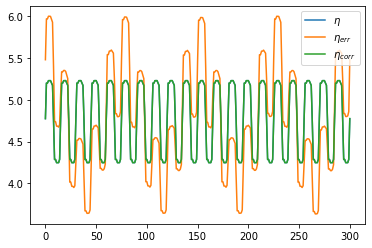

In [22]:
compare_drm(eta_xx, eta_xx_err1, eta_xx_corr)

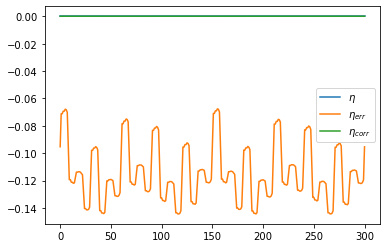

In [23]:
compare_drm(eta_yy, eta_yy_err1, eta_yy_corr)

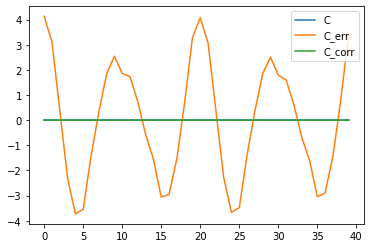

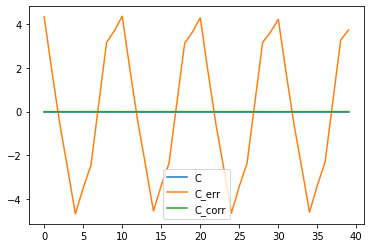

In [24]:
compare_orm(C0xy, Cxy11, Cxy2,25)
compare_orm(C0yx, Cyx11, Cyx2,25)

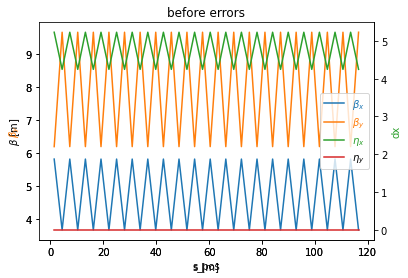

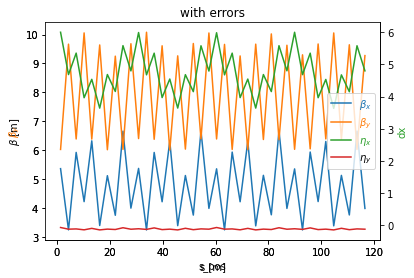

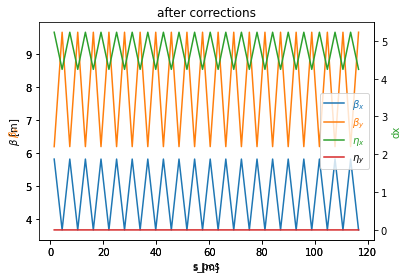

In [25]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corrected, 'after corrections')

In [26]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 59.124019622802734 sec
